In [1]:
import pandas as pd
import numpy as nd
import pm4py
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from collections import Counter
import os
import seaborn as sns

In [2]:
#UPLOAD DATA FROM FILE

complaint_log_raw = pd.read_csv("C:\\Users\90545\Documents\Business information systems\Dataset\dataset_2\BPI2016_Complaints.csv", sep=';', encoding='latin1')

complaint_log = complaint_log_raw [["CustomerID", "AgeCategory", "Gender", "ContactDate", "ComplaintID", "ComplaintThemeID", "ComplaintSubthemeID", "ComplaintTopicID", "ComplaintTheme_EN", "ComplaintSubtheme_EN", "ComplaintTopic_EN"]]

selected_columns = ['ComplaintThemeID', 'ComplaintSubthemeID', 'ComplaintTopicID']
complaint_log['Activity'] = complaint_log[selected_columns].apply(tuple, axis=1).copy()

complaint_log

C:\Users\90545\AppData\Local\Temp\ipykernel_19168\2713989779.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complaint_log['Activity'] = complaint_log[selected_columns].apply(tuple, axis=1).copy()


,CustomerID,AgeCategory,Gender,ContactDate,ComplaintID,ComplaintThemeID,ComplaintSubthemeID,ComplaintTopicID,ComplaintTheme_EN,ComplaintSubtheme_EN,ComplaintTopic_EN,Activity
0,1945807,50-65,M,2016-01-12,220,1,5,1,duration of treatment,N.A.,(Revision) Decision not/too late taken,"(1, 5, 1)"
1,733565,30-39,M,2016-01-12,221,1,5,1,duration of treatment,N.A.,(Revision) Decision not/too late taken,"(1, 5, 1)"
2,413563,18-29,V,2016-02-01,255,3,4,2,services,information/communication to the customer,"(Multiple) requests, to little avail","(3, 4, 2)"
3,2027840,30-39,M,2015-12-11,165,3,4,2,services,information/communication to the customer,"(Multiple) requests, to little avail","(3, 4, 2)"
4,1202227,30-39,V,2015-07-07,6,3,4,2,services,information/communication to the customer,"(Multiple) requests, to little avail","(3, 4, 2)"
...,...,...,...,...,...,...,...,...,...,...,...,...
284,1373382,30-39,V,2015-11-05,102,3,2,68,services,availability/accessibility,change form unreachable,"(3, 2, 68)"
285,1604792,50-65,V,2015-10-16,85,3,3,69,services,payment,"change form is not processed, incorrect payment","(3, 3, 69)"
286,1774398,50-65,M,2016-01-05,198,3,3,69,services,payment,"change form is not processed, incorrect payment","(3, 3, 69)"
287,1840727,30-39,M,2016-01-06,202,3,3,69,services,payment,"change form is not processed, incorrect payment","(3, 3, 69)"


In [3]:
# CHECK THAT THE COLUMNS CustomerID, AgeCategory, Gender, ContactDate, ComplaintTheme_EN, ComplaintSubtheme_EN, ComplaintTopic_EN DO NOT HAVE MISSING VALUES

columns_to_check = ["CustomerID", "AgeCategory", "Gender", "ContactDate", "ComplaintTheme_EN", "ComplaintSubtheme_EN", "ComplaintTopic_EN"]

null_values = complaint_log[columns_to_check].isnull().sum()

for column, count in null_values.items():
    print(f"Column '{column}' has {count} missing values.")

Column 'CustomerID' has 0 missing values.
Column 'AgeCategory' has 0 missing values.
Column 'Gender' has 0 missing values.
Column 'ContactDate' has 0 missing values.
Column 'ComplaintTheme_EN' has 0 missing values.
Column 'ComplaintSubtheme_EN' has 0 missing values.
Column 'ComplaintTopic_EN' has 0 missing values.


C:\Users\90545\AppData\Local\Temp\ipykernel_19168\2281840622.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complaint_log['ContactDate'] = pd.to_datetime(complaint_log['ContactDate'])


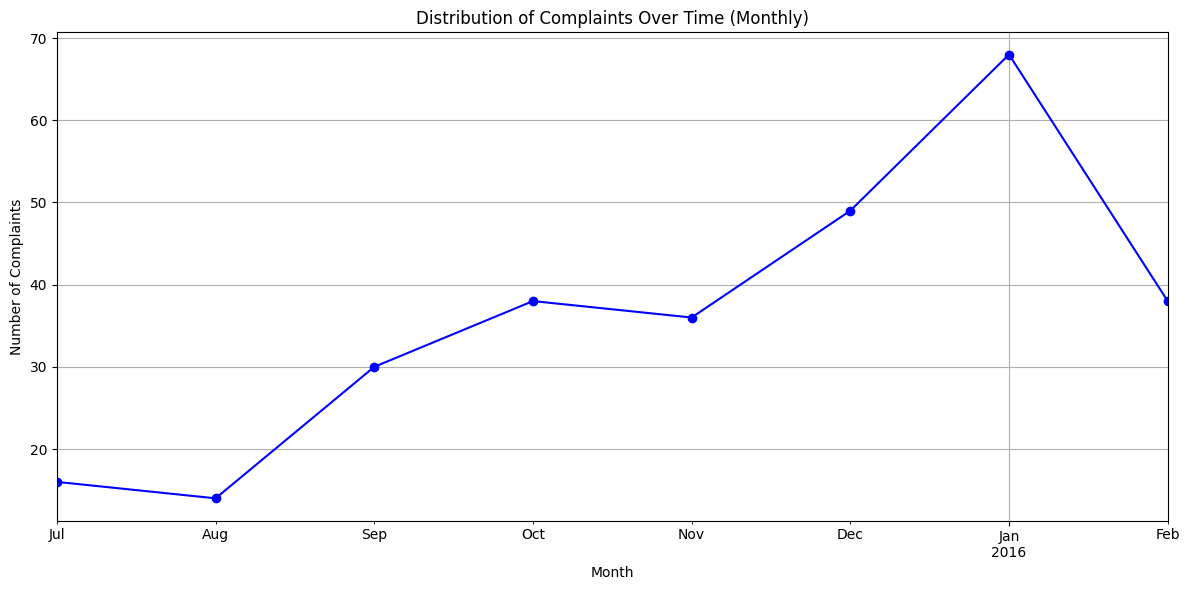

In [4]:
# THE COMPLAINTS DISTRIBUTION OVER THE TIME

complaint_log['ContactDate'] = pd.to_datetime(complaint_log['ContactDate'])

complaints_by_month = complaint_log.groupby(complaint_log['ContactDate'].dt.to_period("M"))['ComplaintID'].count()

plt.figure(figsize=(12, 6))
complaints_by_month.plot(kind='line', marker='o', color='blue')
plt.xlabel('Month')
plt.ylabel('Number of Complaints')
plt.title('Distribution of Complaints Over Time (Monthly)')
plt.grid(True)  
plt.tight_layout()

plt.show()


C:\Users\90545\AppData\Local\Temp\ipykernel_19168\2649433184.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complaint_log_18_29['ContactDate'] = pd.to_datetime(complaint_log_18_29['ContactDate'])


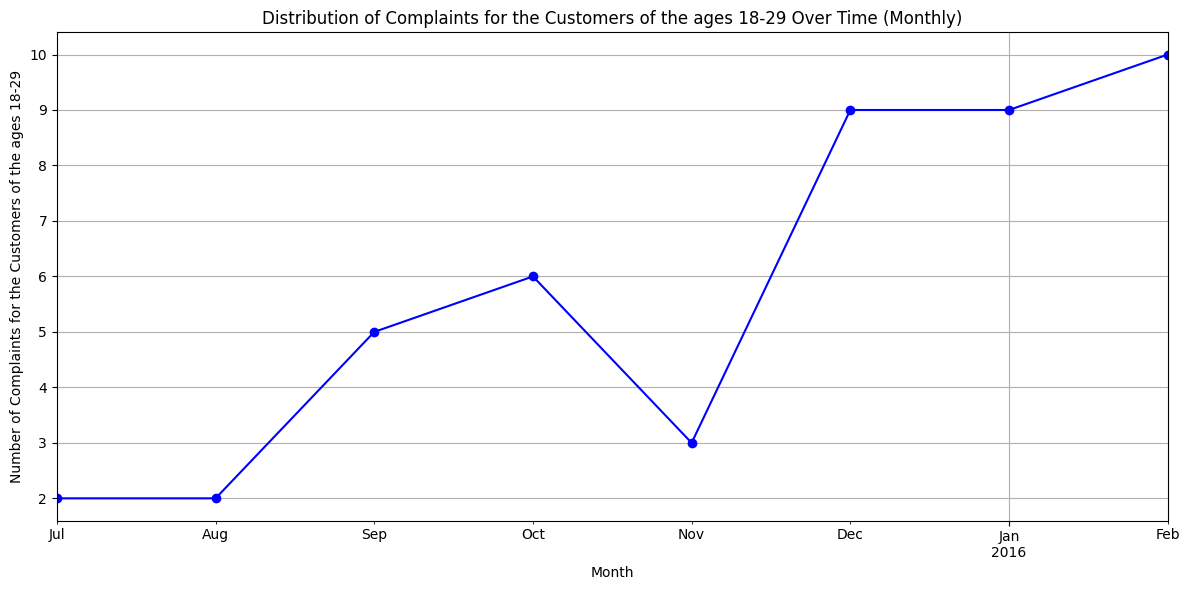

In [5]:
# THE COMPLAINTS DISTRIBUTION FOR THE CUSTOMERS OF THE AGES 18-29 OVER THE TIME

complaint_log_18_29 = complaint_log[complaint_log["AgeCategory"] == "18-29"]

complaint_log_18_29['ContactDate'] = pd.to_datetime(complaint_log_18_29['ContactDate'])

complaints_by_month_18_29 = complaint_log_18_29.groupby(complaint_log_18_29['ContactDate'].dt.to_period("M"))['ComplaintID'].count()

plt.figure(figsize=(12, 6))
complaints_by_month_18_29.plot(kind='line', marker='o', color='blue')
plt.xlabel('Month')
plt.ylabel('Number of Complaints for the Customers of the ages 18-29')
plt.title('Distribution of Complaints for the Customers of the ages 18-29 Over Time (Monthly)')
plt.grid(True)  
plt.tight_layout()

plt.show()

C:\Users\90545\AppData\Local\Temp\ipykernel_19168\2724485200.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complaint_log_30_39['ContactDate'] = pd.to_datetime(complaint_log_30_39['ContactDate'])


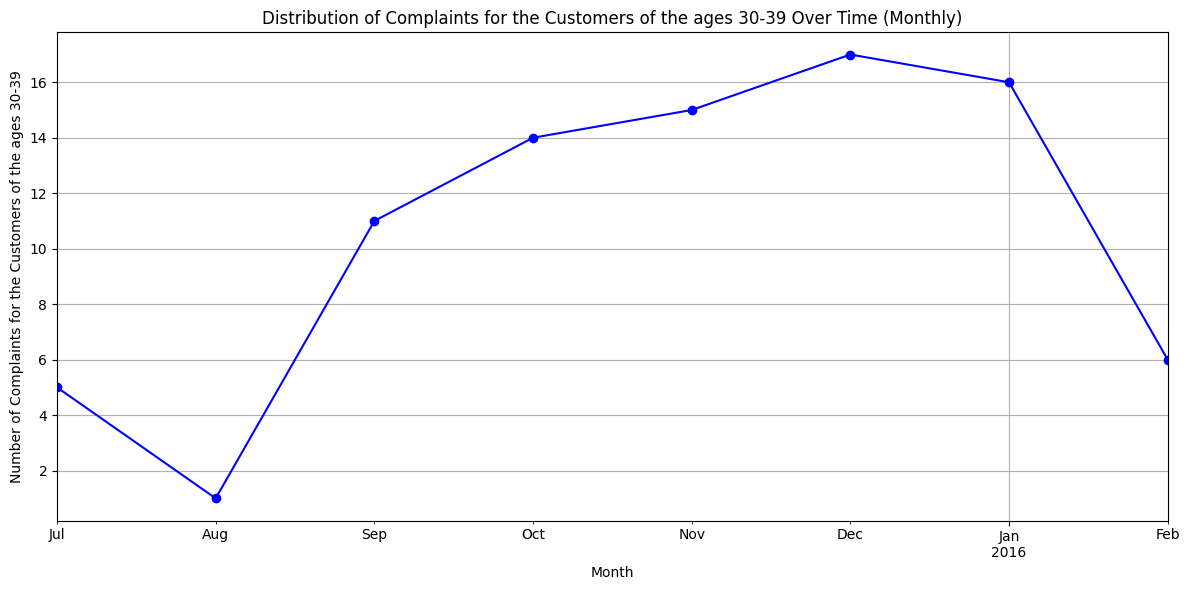

In [6]:
# THE COMPLAINTS DISTRIBUTION FOR THE CUSTOMERS OF THE AGES 30-39 OVER THE TIME

complaint_log_30_39 = complaint_log[complaint_log["AgeCategory"] == "30-39"]

complaint_log_30_39['ContactDate'] = pd.to_datetime(complaint_log_30_39['ContactDate'])

complaints_by_month_30_39 = complaint_log_30_39.groupby(complaint_log_30_39['ContactDate'].dt.to_period("M"))['ComplaintID'].count()

plt.figure(figsize=(12, 6))
complaints_by_month_30_39.plot(kind='line', marker='o', color='blue')
plt.xlabel('Month')
plt.ylabel('Number of Complaints for the Customers of the ages 30-39')
plt.title('Distribution of Complaints for the Customers of the ages 30-39 Over Time (Monthly)')
plt.grid(True)  
plt.tight_layout()

# Show the plot
plt.show()


C:\Users\90545\AppData\Local\Temp\ipykernel_19168\2800255508.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complaint_log_40_49['ContactDate'] = pd.to_datetime(complaint_log_40_49['ContactDate'])


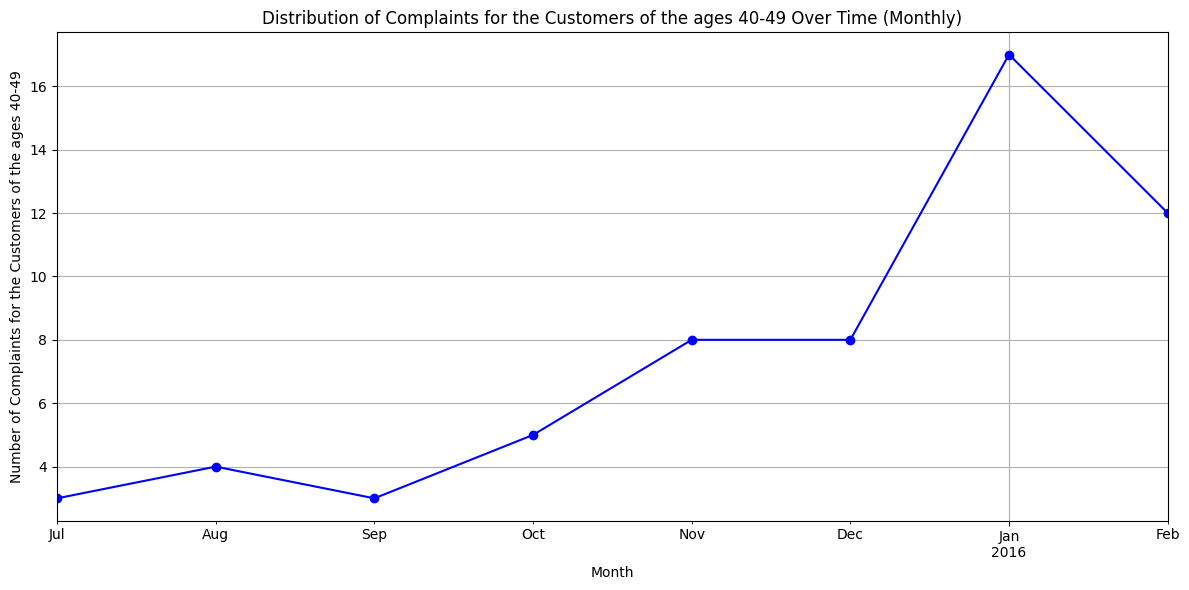

In [7]:
# THE COMPLAINTS DISTRIBUTION FOR THE CUSTOMERS OF THE AGES 40-49 OVER THE TIME

complaint_log_40_49 = complaint_log[complaint_log["AgeCategory"] == "40-49"]

complaint_log_40_49['ContactDate'] = pd.to_datetime(complaint_log_40_49['ContactDate'])

complaints_by_month_40_49 = complaint_log_40_49.groupby(complaint_log_40_49['ContactDate'].dt.to_period("M"))['ComplaintID'].count()

plt.figure(figsize=(12, 6))
complaints_by_month_40_49.plot(kind='line', marker='o', color='blue')
plt.xlabel('Month')
plt.ylabel('Number of Complaints for the Customers of the ages 40-49')
plt.title('Distribution of Complaints for the Customers of the ages 40-49 Over Time (Monthly)')
plt.grid(True)  
plt.tight_layout()

plt.show()

C:\Users\90545\AppData\Local\Temp\ipykernel_19168\1347171856.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complaint_log_50_65['ContactDate'] = pd.to_datetime(complaint_log_50_65['ContactDate'])


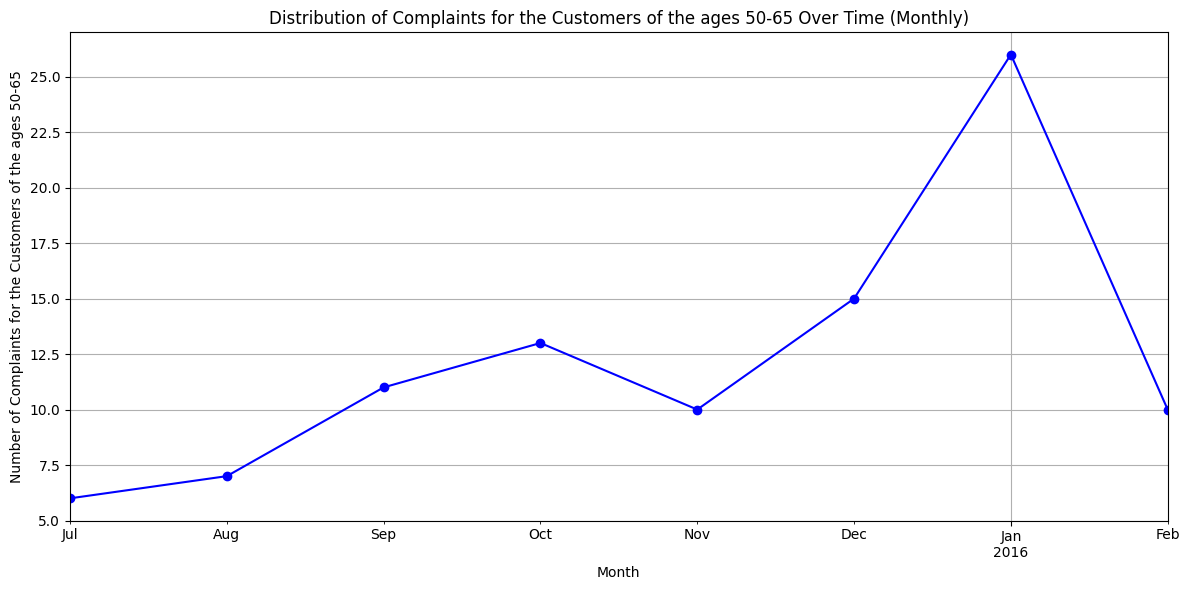

In [8]:
# THE COMPLAINTS DISTRIBUTION FOR THE CUSTOMERS OF THE AGES 50-65 OVER THE TIME

complaint_log_50_65 = complaint_log[complaint_log["AgeCategory"] == "50-65"]

complaint_log_50_65['ContactDate'] = pd.to_datetime(complaint_log_50_65['ContactDate'])

complaints_by_month_50_65 = complaint_log_50_65.groupby(complaint_log_50_65['ContactDate'].dt.to_period("M"))['ComplaintID'].count()

plt.figure(figsize=(12, 6))
complaints_by_month_50_65.plot(kind='line', marker='o', color='blue')
plt.xlabel('Month')
plt.ylabel('Number of Complaints for the Customers of the ages 50-65')
plt.title('Distribution of Complaints for the Customers of the ages 50-65 Over Time (Monthly)')
plt.grid(True)  
plt.tight_layout()

plt.show()

In [9]:
# STATISTICS OF THE COLUMN AgeCategory

grouped_AgeCategory = complaint_log.value_counts("AgeCategory")

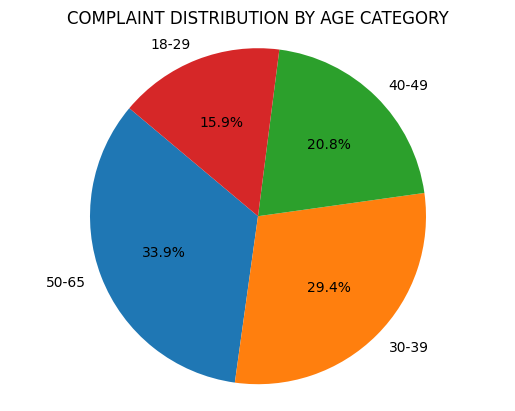

In [10]:
# COMPLAINT DISTRIBUTION BY AgeCategory

plt.pie(grouped_AgeCategory, labels=grouped_AgeCategory.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  
plt.title('COMPLAINT DISTRIBUTION BY AGE CATEGORY')
plt.show()

In [11]:
# STATISTICS OF THE COLUMN Gender

grouped_Gender = complaint_log.value_counts("Gender")

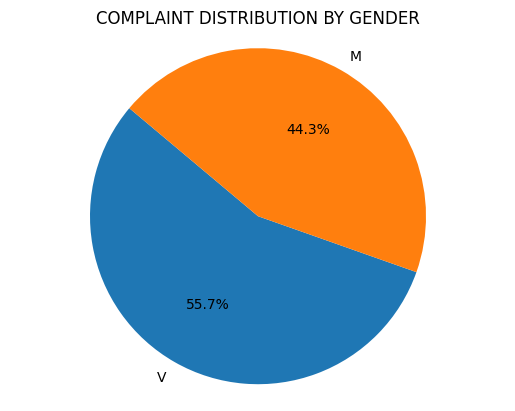

In [12]:
# COMPLAINT DISTRIBUTION BY GENDER

# Create a pie plot   
plt.pie(grouped_Gender, labels=grouped_Gender.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  
plt.title('COMPLAINT DISTRIBUTION BY GENDER')
plt.show()

In [13]:
# STATISTICS OF THE COLUMN ComplaintTheme_EN

grouped_Complaint_Theme = complaint_log.value_counts("ComplaintTheme_EN").reset_index(name="Count")
grouped_Complaint_Theme

,ComplaintTheme_EN,Count
0,services,246
1,treatment (attitude/behavior),41
2,duration of treatment,2


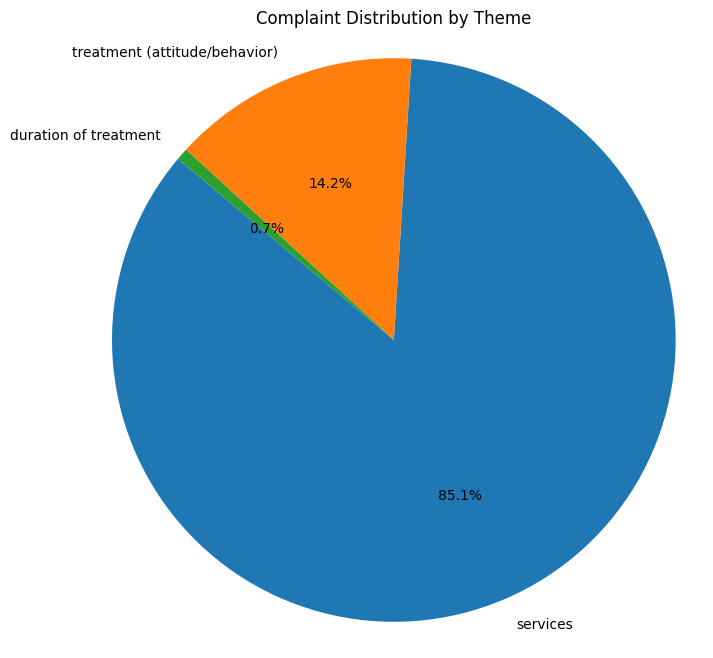

In [16]:
# COMPLAINT DISTRIBUTION BY COMPLAINT THEME (PLOT PIE)

counts = grouped_Complaint_Theme['Count']
themes = grouped_Complaint_Theme['ComplaintTheme_EN']

plt.figure(figsize=(8, 8))
plt.pie(counts, labels=themes, autopct='%1.1f%%', startangle=140)

plt.axis('equal')

plt.title('Complaint Distribution by Theme')

plt.show()

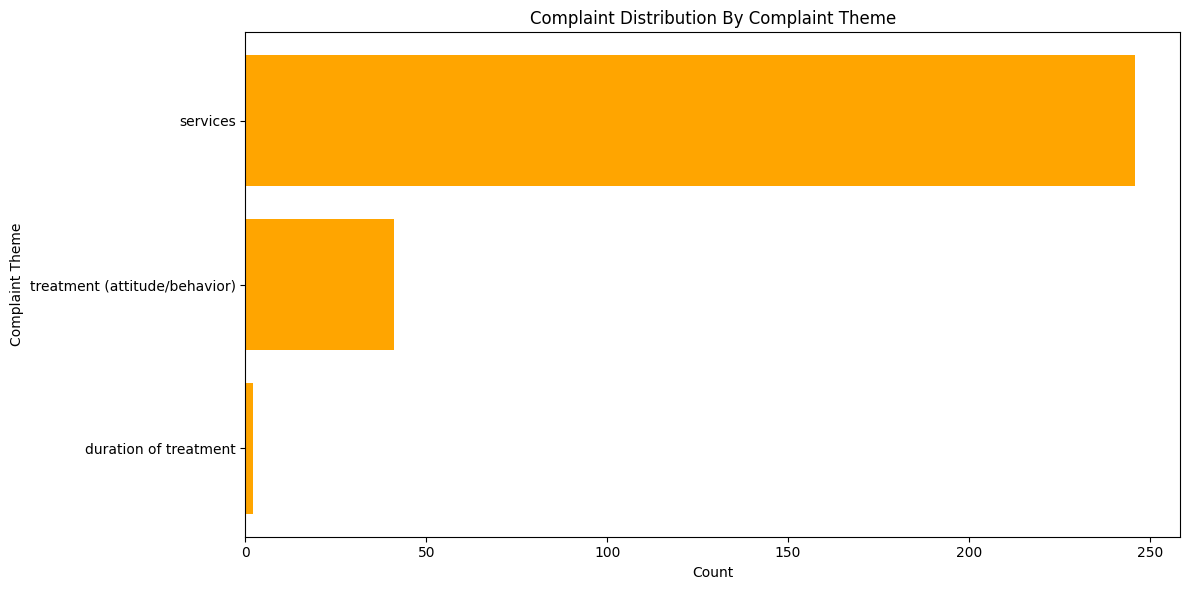

In [20]:
# COMPLAINT DISTRIBUTION BY COMPLAINT THEME (PLOT BAR)

grouped_Complaint_Theme_sorted = grouped_Complaint_Theme.sort_values(by='Count', ascending=False)

activity_names_Complaint_Theme = grouped_Complaint_Theme_sorted['ComplaintTheme_EN']
activity_counts_Complaint_Theme = grouped_Complaint_Theme_sorted['Count']

plt.figure(figsize=(12, 6))
plt.barh(activity_names_Complaint_Theme, activity_counts_Complaint_Theme, color='orange')
plt.xlabel('Count')
plt.ylabel('Complaint Theme')
plt.title('Complaint Distribution By Complaint Theme')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [21]:
# COMPLAINT DISTRIBUTION BY COMPLAINT THEME AND AGE CATEGORY

grouped_complaint_theme_age = complaint_log.groupby(["ComplaintTheme_EN", "AgeCategory"])["AgeCategory"].count()

grouped_complaint_theme_age = grouped_complaint_theme_age.rename("Count")

grouped_complaint_theme_age = grouped_complaint_theme_age.reset_index()

grouped_complaint_theme_age

,ComplaintTheme_EN,AgeCategory,Count
0,duration of treatment,30-39,1
1,duration of treatment,50-65,1
2,services,18-29,42
3,services,30-39,68
4,services,40-49,50
5,services,50-65,86
6,treatment (attitude/behavior),18-29,4
7,treatment (attitude/behavior),30-39,16
8,treatment (attitude/behavior),40-49,10
9,treatment (attitude/behavior),50-65,11


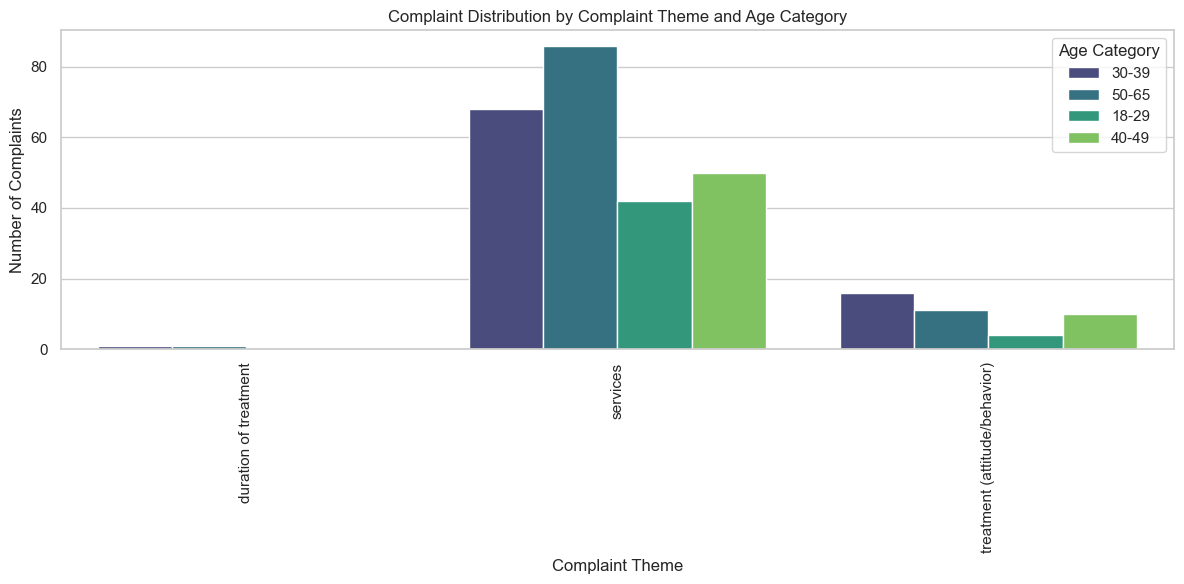

In [22]:
# COMPLAINT DISTRIBUTION BY COMPLAINT THEME AND AGE CATEGORY (PLOT_DETAILED)

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(
    data=grouped_complaint_theme_age,  
    x="ComplaintTheme_EN",
    y="Count",  
    hue="AgeCategory",         
    palette="viridis",        
)

plt.title("Complaint Distribution by Complaint Theme and Age Category")
plt.xlabel("Complaint Theme")
plt.ylabel("Number of Complaints")
plt.xticks(rotation=90) 

plt.legend(title="Age Category")
plt.tight_layout()
plt.show()

In [23]:
# COMPLAINT DISTRIBUTION BY COMPLAINT THEME AND GENDER

grouped_complaint_theme_gender = complaint_log.groupby(["ComplaintTheme_EN", "Gender"])["Gender"].count()

grouped_complaint_theme_gender = grouped_complaint_theme_gender.rename("Count")

grouped_complaint_theme_gender = grouped_complaint_theme_gender.reset_index()

grouped_complaint_theme_gender

,ComplaintTheme_EN,Gender,Count
0,duration of treatment,M,2
1,services,M,104
2,services,V,142
3,treatment (attitude/behavior),M,22
4,treatment (attitude/behavior),V,19


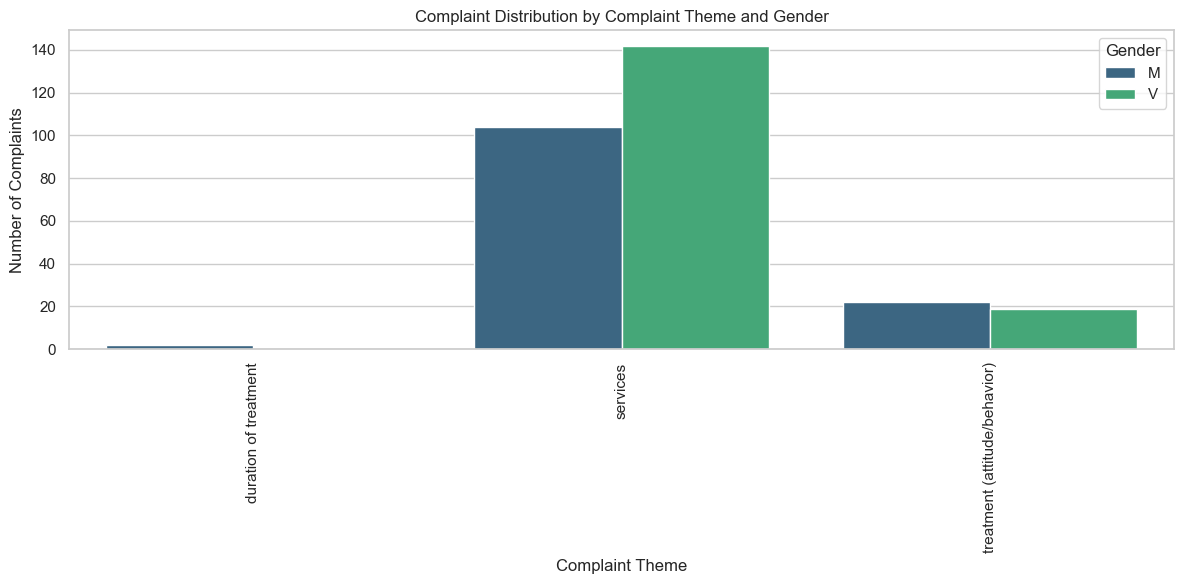

In [24]:
# COMPLAINT DISTRIBUTION BY COMPLAINT THEME AND GENDER (PLOT_DETAILED)

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(
    data=grouped_complaint_theme_gender,  
    x="ComplaintTheme_EN",
    y="Count",  
    hue="Gender",        
    palette="viridis",        
)

plt.title("Complaint Distribution by Complaint Theme and Gender")
plt.xlabel("Complaint Theme")
plt.ylabel("Number of Complaints")
plt.xticks(rotation=90)  

plt.legend(title="Gender")
plt.tight_layout()
plt.show()

In [25]:
# STATISTICS OF THE COLUMN ComplaintSubtheme_EN

grouped_Complaint_SubTheme = complaint_log.value_counts("ComplaintSubtheme_EN").reset_index(name="Count")
grouped_Complaint_SubTheme

,ComplaintSubtheme_EN,Count
0,information/communication to the customer,105
1,payment,71
2,availability/accessibility,53
3,N.A.,43
4,support/handling,17


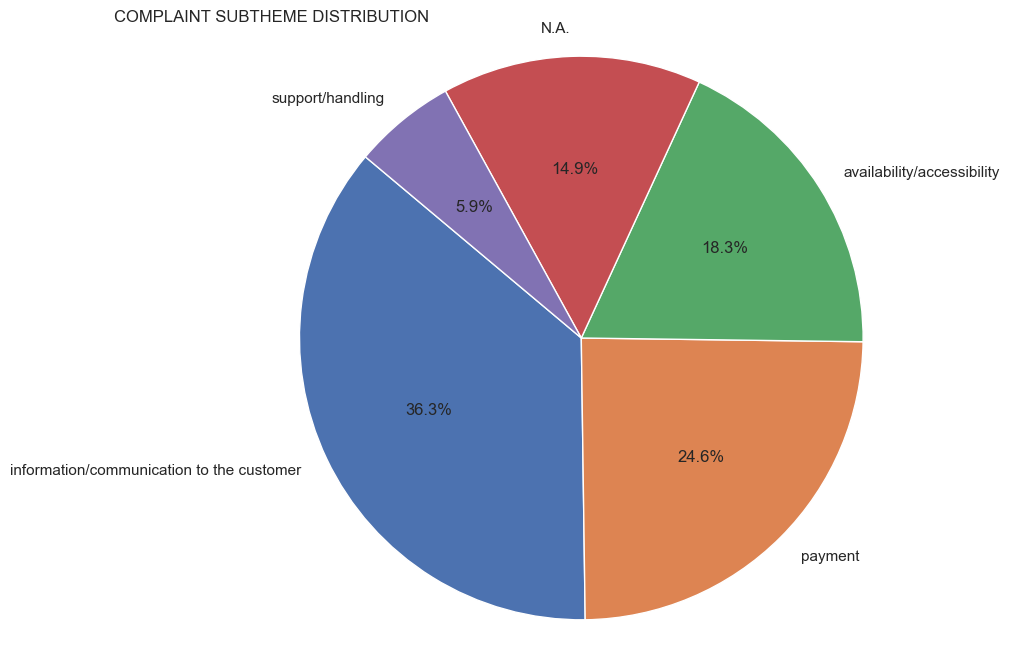

In [26]:
# COMPLAINT DISTRIBUTION BY COMPLAINT SUBTHEME (PLOT PIE)

grouped_Complaint_SubTheme = complaint_log['ComplaintSubtheme_EN'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(grouped_Complaint_SubTheme, labels=grouped_Complaint_SubTheme.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('COMPLAINT SUBTHEME DISTRIBUTION', x=0, y=1)
plt.show()

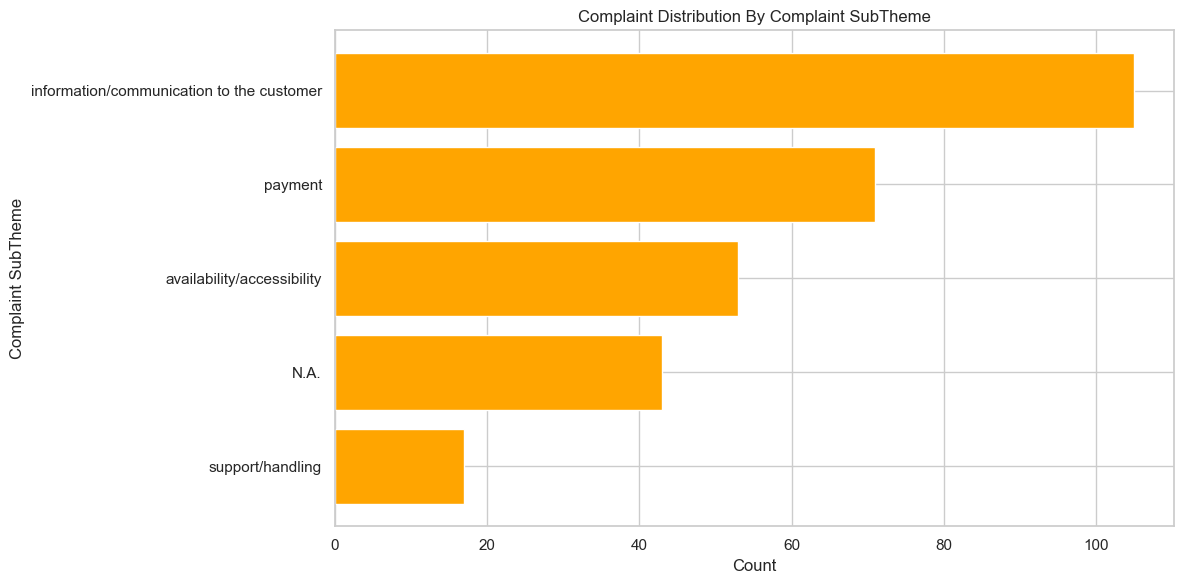

In [27]:
# COMPLAINT DISTRIBUTION BY COMPLAINT SUBTHEME (PLOT BAR)

grouped_Complaint_SubTheme_dict = dict(sorted(grouped_Complaint_SubTheme.items(), key=lambda x: x[1], reverse=True))

activity_names_Complaint_SubTheme = list(grouped_Complaint_SubTheme_dict.keys())
activity_counts_Complaint_SubTheme = list(grouped_Complaint_SubTheme_dict.values())

plt.figure(figsize=(12, 6))
plt.barh(activity_names_Complaint_SubTheme, activity_counts_Complaint_SubTheme, color='orange')
plt.xlabel('Count')
plt.ylabel('Complaint SubTheme')
plt.title('Complaint Distribution By Complaint SubTheme')
plt.gca().invert_yaxis()  
plt.tight_layout()

plt.show()

In [28]:
# COMPLAINT DISTRIBUTION BY COMPLAINT SUBTHEME AND AGE CATEGORY

grouped_complaint_subtheme_age = complaint_log.groupby(["ComplaintSubtheme_EN", "AgeCategory"])["AgeCategory"].count()

grouped_complaint_subtheme_age = grouped_complaint_subtheme_age.rename("Count")

grouped_complaint_subtheme_age = grouped_complaint_subtheme_age.reset_index()

grouped_complaint_subtheme_age

,ComplaintSubtheme_EN,AgeCategory,Count
0,N.A.,18-29,4
1,N.A.,30-39,17
2,N.A.,40-49,10
3,N.A.,50-65,12
4,availability/accessibility,18-29,8
5,availability/accessibility,30-39,13
6,availability/accessibility,40-49,9
7,availability/accessibility,50-65,23
8,information/communication to the customer,18-29,18
9,information/communication to the customer,30-39,32


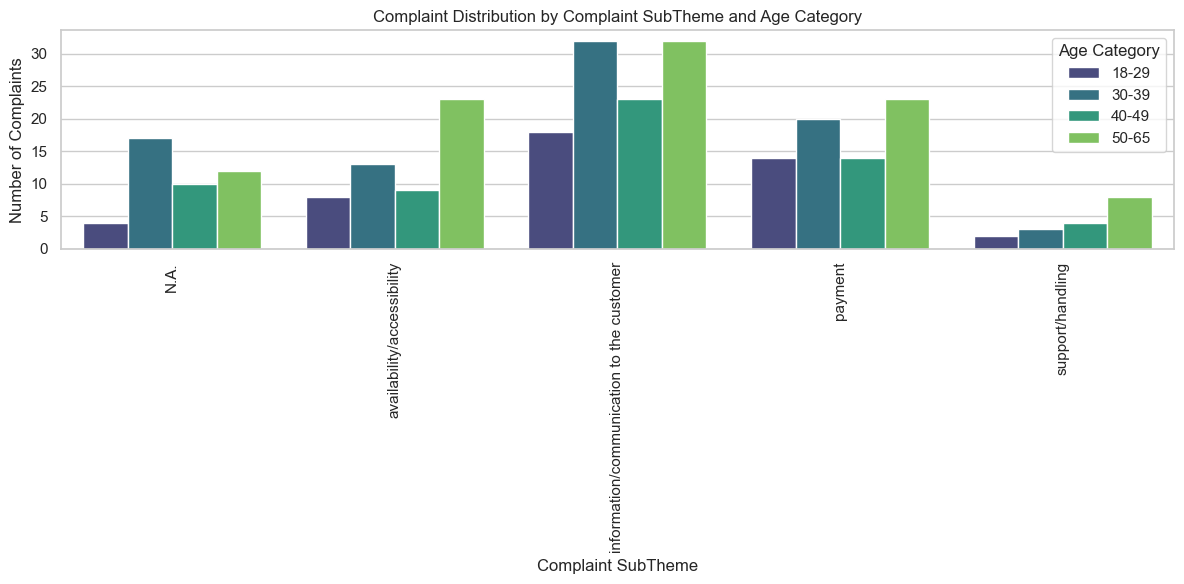

In [29]:
# COMPLAINT DISTRIBUTION BY COMPLAINT SUBTHEME AND AGE CATEGORY (PLOT_DETAILED)

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(
    data=grouped_complaint_subtheme_age,  
    x="ComplaintSubtheme_EN",
    y="Count",  
    hue="AgeCategory",         
    palette="viridis",       
)

plt.title("Complaint Distribution by Complaint SubTheme and Age Category")
plt.xlabel("Complaint SubTheme")
plt.ylabel("Number of Complaints")
plt.xticks(rotation=90)  

plt.legend(title="Age Category")
plt.tight_layout()
plt.show()

In [30]:
# COMPLAINT DISTRIBUTION BY COMPLAINT SUBTHEME AND GENDER

grouped_complaint_subtheme_gender = complaint_log.groupby(["ComplaintSubtheme_EN", "Gender"])["Gender"].count()

grouped_complaint_subtheme_gender = grouped_complaint_subtheme_gender.rename("Count")

grouped_complaint_subtheme_gender = grouped_complaint_subtheme_gender.reset_index()

grouped_complaint_subtheme_gender

,ComplaintSubtheme_EN,Gender,Count
0,N.A.,M,24
1,N.A.,V,19
2,availability/accessibility,M,20
3,availability/accessibility,V,33
4,information/communication to the customer,M,43
5,information/communication to the customer,V,62
6,payment,M,35
7,payment,V,36
8,support/handling,M,6
9,support/handling,V,11


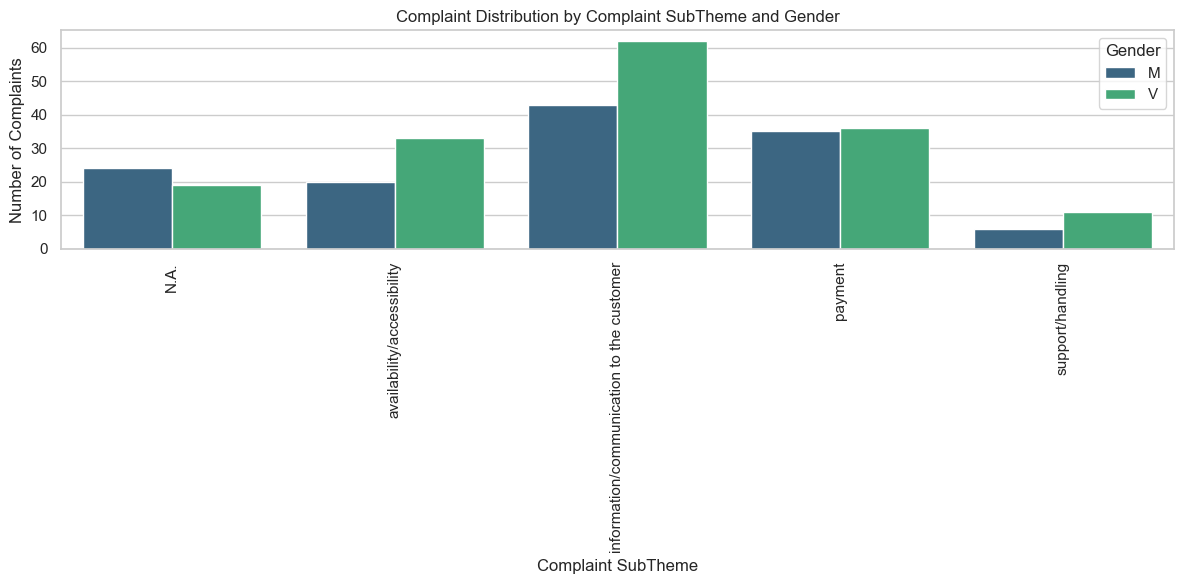

In [31]:
# COMPLAINT DISTRIBUTION BY COMPLAINT SUBTHEME AND GENDER (PLOT_DETAILED)

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(
    data=grouped_complaint_subtheme_gender,  
    x="ComplaintSubtheme_EN",
    y="Count",  
    hue="Gender",         
    palette="viridis",        
)

plt.title("Complaint Distribution by Complaint SubTheme and Gender")
plt.xlabel("Complaint SubTheme")
plt.ylabel("Number of Complaints")
plt.xticks(rotation=90)  

plt.legend(title="Gender")
plt.tight_layout()
plt.show()

In [32]:
# STATISTICS OF THE COLUMN ComplaintTopic_EN

grouped_Complaint_Topic = complaint_log.value_counts("ComplaintTopic_EN").reset_index(name="Count")
grouped_Complaint_Topic

,ComplaintTopic_EN,Count
0,Information: incorrect/inconsistent,34
1,no respect/not taken seriously,25
2,income form ww unreachable,21
3,Information: no/insufficient,20
4,payment over a certain period is missing,19
...,...,...
65,Pay spec. no info on lower net,1
66,long hold,1
67,no callback registered/not registered,1
68,no possibility to advance,1


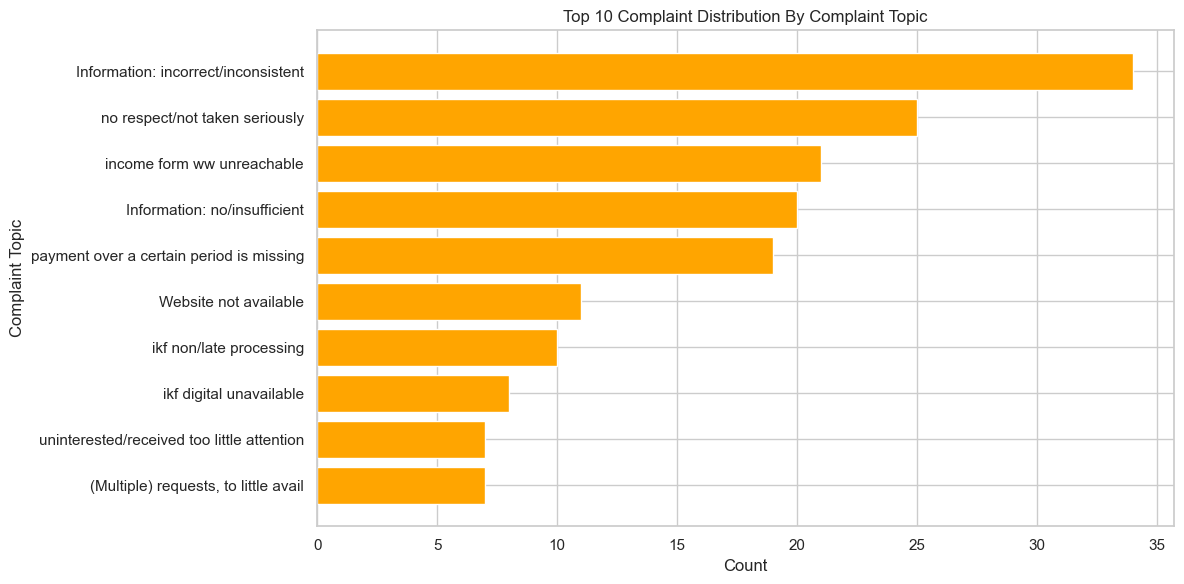

In [37]:
# TOP 10 COMPLAINT DISTRIBUTION BY COMPLAINT SUBTHEME (PLOT BAR)

grouped_Complaint_Topic_df = grouped_Complaint_Topic.reset_index()  
sorted_data = grouped_Complaint_Topic_df.sort_values(by='Count', ascending=False).head(10) 

plt.figure(figsize=(12, 6))
plt.barh(sorted_data['ComplaintTopic_EN'], sorted_data['Count'], color='orange')
plt.xlabel('Count')
plt.ylabel('Complaint Topic')
plt.title('Top 10 Complaint Distribution By Complaint Topic')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [38]:
# COMPLAINT DISTRIBUTION BY COMPLAINT TOPIC AND AGE CATEGORY

grouped_complaint_topic_age = complaint_log.groupby(["ComplaintTopic_EN", "AgeCategory"])["AgeCategory"].count()

grouped_complaint_topic_age = grouped_complaint_topic_age.rename("Count")

grouped_complaint_topic_age = grouped_complaint_topic_age.reset_index()

grouped_complaint_topic_age

,ComplaintTopic_EN,AgeCategory,Count
0,"(Multiple) requests, to little avail",18-29,1
1,"(Multiple) requests, to little avail",30-39,3
2,"(Multiple) requests, to little avail",40-49,2
3,"(Multiple) requests, to little avail",50-65,1
4,(Revision) Decision not/too late taken,30-39,1
...,...,...,...
135,uninterested/received too little attention,50-65,1
136,unreasonable application rules,30-39,1
137,unreasonable application rules,50-65,1
138,uwv does not feel responsible,40-49,1


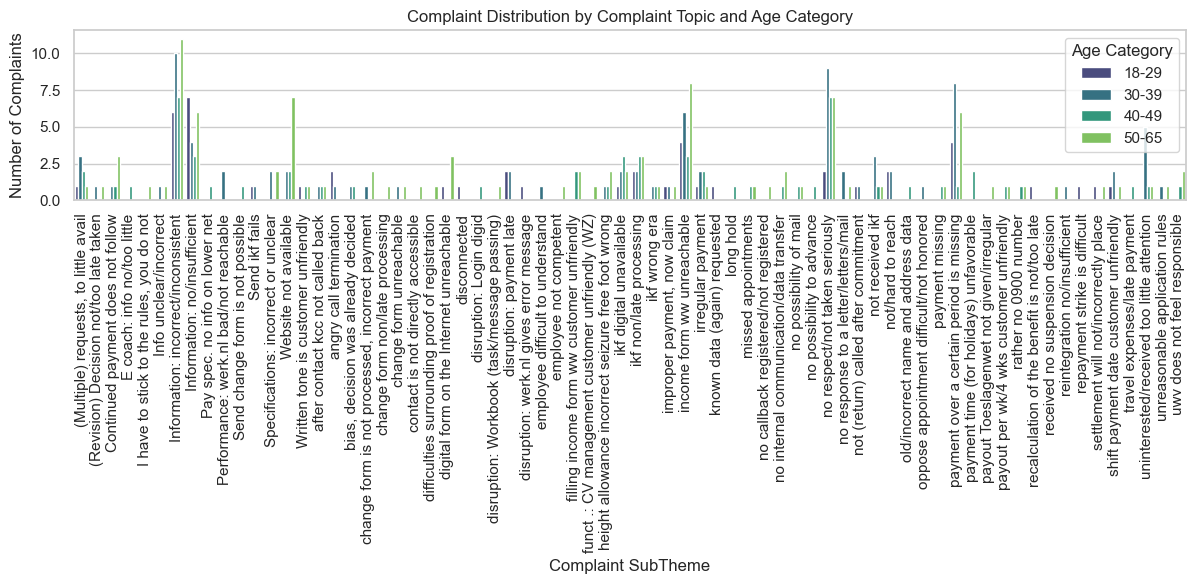

In [39]:
# COMPLAINT DISTRIBUTION BY COMPLAINT TOPIC AND AGE CATEGORY (PLOT_DETAILED)

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(
    data=grouped_complaint_topic_age,  
    x="ComplaintTopic_EN",
    y="Count",  
    hue="AgeCategory",         
    palette="viridis",       
)

plt.title("Complaint Distribution by Complaint Topic and Age Category")
plt.xlabel("Complaint SubTheme")
plt.ylabel("Number of Complaints")
plt.xticks(rotation=90)  

plt.legend(title="Age Category")
plt.tight_layout()
plt.show()

In [40]:
# COMPLAINT DISTRIBUTION BY COMPLAINT TOPIC AND GENDER

grouped_complaint_topic_gender = complaint_log.groupby(["ComplaintTopic_EN", "Gender"])["Gender"].count()

grouped_complaint_topic_gender = grouped_complaint_topic_gender.rename("Count")

grouped_complaint_topic_gender = grouped_complaint_topic_gender.reset_index()

grouped_complaint_topic_gender

,ComplaintTopic_EN,Gender,Count
0,"(Multiple) requests, to little avail",M,3
1,"(Multiple) requests, to little avail",V,4
2,(Revision) Decision not/too late taken,M,2
3,Continued payment does not follow,M,3
4,Continued payment does not follow,V,2
...,...,...,...
97,travel expenses/late payment,M,1
98,uninterested/received too little attention,M,6
99,uninterested/received too little attention,V,1
100,unreasonable application rules,V,2


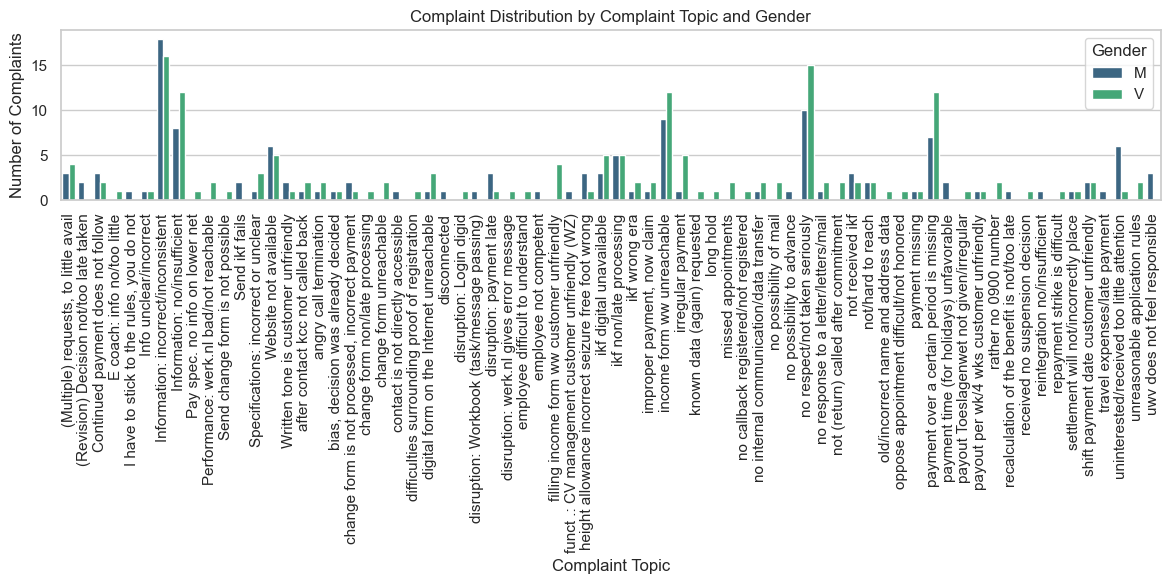

In [41]:
# COMPLAINT DISTRIBUTION BY COMPLAINT TOPIC AND GENDER (PLOT_DETAILED)

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(
    data=grouped_complaint_topic_gender,  
    x="ComplaintTopic_EN",
    y="Count",  
    hue="Gender",         
    palette="viridis",       
)

plt.title("Complaint Distribution by Complaint Topic and Gender")
plt.xlabel("Complaint Topic")
plt.ylabel("Number of Complaints")
plt.xticks(rotation=90)  

plt.legend(title="Gender")
plt.tight_layout()
plt.show()

In [42]:
# STATICTICS ABOUT ACTIVITY

activity_counts = complaint_log["Activity"].value_counts()

sorted_activity_counts = activity_counts.sort_values(ascending=True)

count_of_counts = sorted_activity_counts.value_counts()

count_of_counts_df = count_of_counts.reset_index()

count_of_counts_df.columns = ['Activity Count', 'Frequency']

print(count_of_counts_df)


    Activity Count  Frequency
0                1         26
1                2         15
2                3          9
3                4          7
4                5          2
5                7          2
6                6          1
7                8          1
8               10          1
9               11          1
10              19          1
11              20          1
12              21          1
13              25          1
14              34          1


In [43]:
# STATISTICS OF THE COLUMN ComplaintTopic_EN

grouped_activity = complaint_log.value_counts("Activity").reset_index(name="Count")

grouped_activity['Percentage'] = ((grouped_activity['Count'] / grouped_activity['Count'].sum()) * 100).round(2)

grouped_activity = grouped_activity.rename(columns={"Action": "Action", "Percentage": "Percentage of Occurrence"})
grouped_activity.sort_values("Count", ascending = False)
grouped_activity.head(10)

,Activity,Count,Percentage of Occurrence
0,"(3, 4, 32)",34,11.76
1,"(2, 5, 20)",25,8.65
2,"(3, 2, 33)",21,7.27
3,"(3, 4, 31)",20,6.92
4,"(3, 3, 9)",19,6.57
5,"(3, 2, 67)",11,3.81
6,"(3, 3, 27)",10,3.46
7,"(3, 4, 26)",8,2.77
8,"(2, 5, 44)",7,2.42
9,"(3, 4, 2)",7,2.42


In [44]:
# TOP 5 USED COMPLAINTS THEME + SUBTHEME + TOPIC

grouped_activity_percentage = grouped_activity[grouped_activity['Percentage of Occurrence'] > 5]
grouped_activity_percentage = grouped_activity_percentage.sort_values(by ='Percentage of Occurrence', ascending = False)
grouped_activity_percentage = grouped_activity_percentage.reset_index()

grouped_activity_percentage


,index,Activity,Count,Percentage of Occurrence
0,0,"(3, 4, 32)",34,11.76
1,1,"(2, 5, 20)",25,8.65
2,2,"(3, 2, 33)",21,7.27
3,3,"(3, 4, 31)",20,6.92
4,4,"(3, 3, 9)",19,6.57


<Figure size 1600x1600 with 0 Axes>

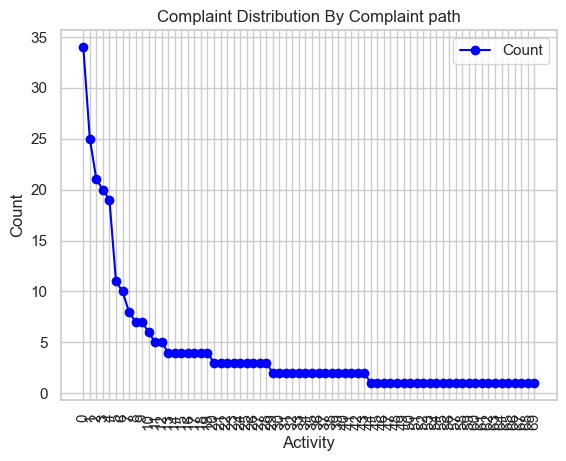

In [45]:
# MAKE A LINE PLOT OF THE FREQUENCIES OF THE ACTIVITIES

grouped_activity_plot = complaint_log.value_counts("Activity").reset_index(name="Count")

plt.figure(figsize=(16, 16))
act_plot = grouped_activity_plot.plot(kind='line', marker='o', color='blue')
plt.xlabel('Activity')
plt.ylabel('Count')
plt.title('Complaint Distribution By Complaint path')

x_labels = grouped_activity_plot.index  
plt.xticks(range(len(x_labels)), x_labels, rotation=90)  

plt.show()

In [46]:
# COMPLAINT DISTRIBUTION BY ACTIVITY AND AGE CATEGORY

grouped_activity_filtered = grouped_activity[grouped_activity["Count"] > 5]

grouped_complaint_activity_age = complaint_log.groupby(["Activity", "AgeCategory"])["AgeCategory"].count()

grouped_complaint_activity_age = grouped_complaint_activity_age.rename("Count")

grouped_complaint_activity_age = grouped_complaint_activity_age.reset_index()

filtered_activities = grouped_activity_filtered["Activity"].tolist()
grouped_complaint_activity_age = grouped_complaint_activity_age[grouped_complaint_activity_age["Activity"].isin(filtered_activities)]

grouped_complaint_activity_age

,Activity,AgeCategory,Count
4,"(2, 5, 20)",18-29,2
5,"(2, 5, 20)",30-39,9
6,"(2, 5, 20)",40-49,7
7,"(2, 5, 20)",50-65,7
9,"(2, 5, 44)",30-39,5
10,"(2, 5, 44)",40-49,1
11,"(2, 5, 44)",50-65,1
35,"(3, 2, 33)",18-29,4
36,"(3, 2, 33)",30-39,6
37,"(3, 2, 33)",40-49,3


In [75]:
# COMPLAINT DISTRIBUTION BY ACTIVITY AND AGE CATEGORY

grouped_activity_filtered = grouped_activity[grouped_activity["Percentage of Occurrence"] > 5]

grouped_complaint_activity_age = complaint_log.groupby(["Activity", "AgeCategory"])["AgeCategory"].count()

grouped_complaint_activity_age = grouped_complaint_activity_age.rename("Count")

grouped_complaint_activity_age = grouped_complaint_activity_age.reset_index()

filtered_activities = grouped_activity_filtered["Activity"].tolist()
grouped_complaint_activity_age = grouped_complaint_activity_age[grouped_complaint_activity_age["Activity"].isin(filtered_activities)]

grouped_complaint_activity_age

,Activity,AgeCategory,Count
4,"(2, 5, 20)",18-29,2
5,"(2, 5, 20)",30-39,9
6,"(2, 5, 20)",40-49,7
7,"(2, 5, 20)",50-65,7
35,"(3, 2, 33)",18-29,4
36,"(3, 2, 33)",30-39,6
37,"(3, 2, 33)",40-49,3
38,"(3, 2, 33)",50-65,8
63,"(3, 3, 9)",18-29,4
64,"(3, 3, 9)",30-39,8


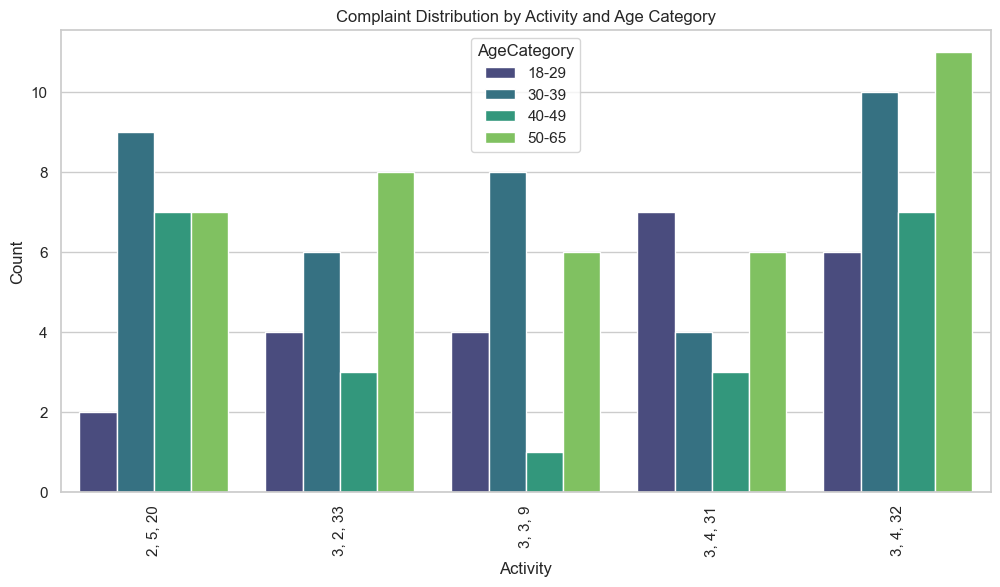

In [76]:
# COMPLAINT DISTRIBUTION BY ACTIVITY AND AGE CATEGORY (PLOT_DETAILED)

def flatten_activity(activity):
    return ", ".join(map(str, activity))

grouped_complaint_activity_age['Activity'] = grouped_complaint_activity_age['Activity'].apply(flatten_activity)

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(
    data=grouped_complaint_activity_age,
    x="Activity",
    y="Count",
    hue="AgeCategory",
    palette="viridis"
)
plt.title("Complaint Distribution by Activity and Age Category")
plt.xlabel("Activity")
plt.xticks(rotation=90)
plt.show()


In [77]:
# COMPLAINT DISTRIBUTION BY ACTIVITY AND GENDER

grouped_activity_filtered = grouped_activity[grouped_activity["Percentage of Occurrence"] > 5]

grouped_complaint_activity_gender = complaint_log.groupby(["Activity", "Gender"])["Gender"].count()

grouped_complaint_activity_gender = grouped_complaint_activity_gender.rename("Count")

grouped_complaint_activity_gender = grouped_complaint_activity_gender.reset_index()

filtered_activities = grouped_activity_filtered["Activity"].tolist()
grouped_complaint_activity_gender = grouped_complaint_activity_gender[grouped_complaint_activity_gender["Activity"].isin(filtered_activities)]

grouped_complaint_activity_gender

,Activity,Gender,Count
3,"(2, 5, 20)",M,10
4,"(2, 5, 20)",V,15
26,"(3, 2, 33)",M,9
27,"(3, 2, 33)",V,12
46,"(3, 3, 9)",M,7
47,"(3, 3, 9)",V,12
87,"(3, 4, 31)",M,8
88,"(3, 4, 31)",V,12
89,"(3, 4, 32)",M,18
90,"(3, 4, 32)",V,16


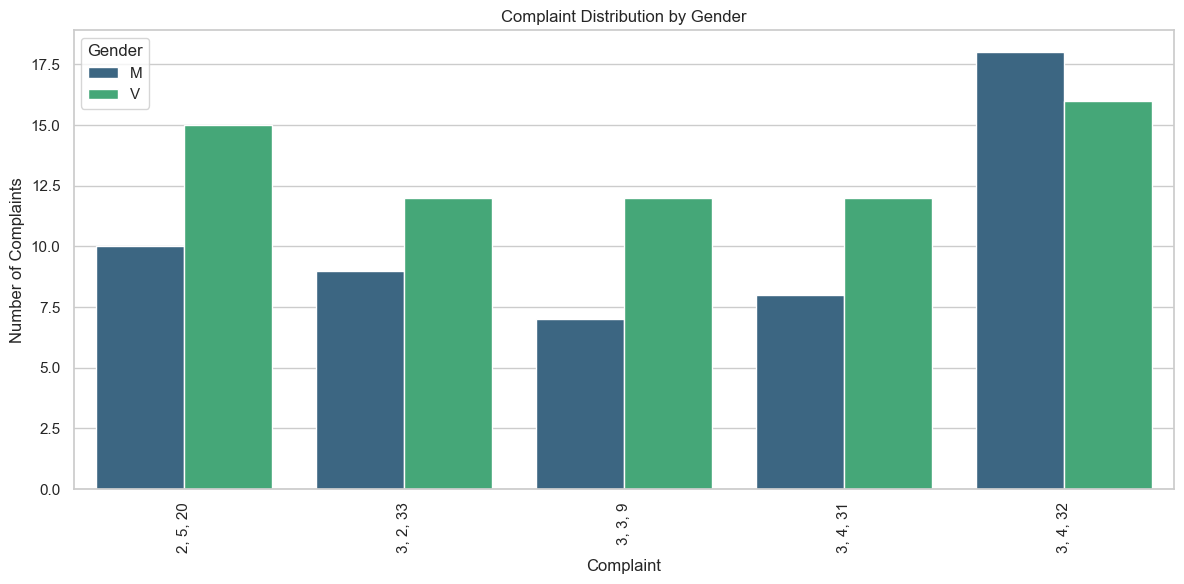

In [79]:
# COMPLAINT DISTRIBUTION BY ACTIVITY AND GENDER (PLOT_DETAILED)

grouped_complaint_activity_gender['Activity'] = grouped_complaint_activity_gender['Activity'].apply(flatten_activity)

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(
    data=grouped_complaint_activity_gender,  
    x="Activity",
    y="Count",  
    hue="Gender",         
    palette="viridis",        
)

plt.title("Complaint Distribution by Gender")
plt.xlabel("Complaint")
plt.ylabel("Number of Complaints")
plt.xticks(rotation=90)  

plt.legend(title="Gender")
plt.tight_layout()
plt.show()

In [80]:
# TOP 5 USED COMPLAINTS THEME + SUBTHEME + TOPIC

def map_activity(activity):
    matching_row = complaint_log[
        (complaint_log['ComplaintThemeID'] == activity[0]) &
        (complaint_log['ComplaintSubthemeID'] == activity[1]) &
        (complaint_log['ComplaintTopicID'] == activity[2])
    ]
    
    if not matching_row.empty:
        return (
            matching_row['ComplaintTheme_EN'].values[0],
            matching_row['ComplaintSubtheme_EN'].values[0],
            matching_row['ComplaintTopic_EN'].values[0]
        )
    else:
        return None

grouped_activity_percentage['Detailed Activity'] = grouped_activity_percentage['Activity'].apply(map_activity)
pd.set_option('display.max_colwidth', None)

grouped_activity_percentage

,index,Activity,Count,Percentage of Occurrence,Detailed Activity
0,0,"(3, 4, 32)",34,11.76,"(services, information/communication to the customer, Information: incorrect/inconsistent)"
1,1,"(2, 5, 20)",25,8.65,"(treatment (attitude/behavior), N.A., no respect/not taken seriously)"
2,2,"(3, 2, 33)",21,7.27,"(services, availability/accessibility, income form ww unreachable)"
3,3,"(3, 4, 31)",20,6.92,"(services, information/communication to the customer, Information: no/insufficient)"
4,4,"(3, 3, 9)",19,6.57,"(services, payment, payment over a certain period is missing)"


In [81]:
for index, row in grouped_activity_percentage.iterrows():
    activity_value = row['Activity']
    detailed_activity_value = row['Detailed Activity']
    
    print(f"{activity_value} -> {detailed_activity_value}")

(3, 4, 32) -> ('services', 'information/communication to the customer', 'Information: incorrect/inconsistent')
(2, 5, 20) -> ('treatment (attitude/behavior)', 'N.A.', 'no respect/not taken seriously')
(3, 2, 33) -> ('services', 'availability/accessibility', 'income form ww unreachable')
(3, 4, 31) -> ('services', 'information/communication to the customer', 'Information: no/insufficient')
(3, 3, 9) -> ('services', 'payment', 'payment over a certain period is missing')


In [82]:
# TO GET THE LIST OF CUSTOMERS WITH THE ACTIVITY = (3, 4, 32)

desired_activity = (3, 4, 32)
filtered_customers_3_4_32 = complaint_log[complaint_log['Activity'] == desired_activity]['CustomerID'].tolist()

print(filtered_customers_3_4_32)

[1202227, 1202227, 2023026, 2085978, 2016054, 2044969, 2014479, 2052609, 1867058, 2023026, 82687, 805947, 357639, 2076543, 2057965, 1282478, 2103717, 413563, 2209183, 2102453, 2072697, 2080613, 2088056, 1080488, 1403721, 768741, 1466647, 18444, 1774398, 2072184, 126446, 2186931, 1229413, 241062]
